One thing I do know, I was blind but now I see. (John 9:25b)

-------
<img src="https://github.com/idebtor/DSpy/blob/6b3676c3de29f85d2e7f30679676d1fd96d88b17/images/WelcomeToDataStructures.jpg?raw=true" width=1000>

__NOTE:__ The following materials have been compiled and adapted from the numerous sources including my own. Please help me to keep this tutorial up-to-date by reporting any issues or questions. Send any comments or criticisms to `idebtor@gmail.com` Your assistances and comments will be appreciated.

--------


<b style="font-size:30px"> Chapter 2. Performance Analysis </b>

: 알고리즘 분석과 Big-O Notation

--------------
제 2장에서는 알고리즘 분석이 중요한 이유를 배우고 이해합니다. 또한, __Big-O__표기법을 사용하여 파이썬 목록(`list`) 및 사전(`dict`)에 대한 일반적인 작업의 실행 시간을 분석해 봅니다. __Big-O__표기법이란 알고리즘의 효율성을 표기해주는 표기법입니다.

# Introduction

1.1 알고리즘 분석은 무엇인가?  
1.2 __Big-O__ 표기법


## 알고리즘 분석은 무엇인가?

1장에서 언급했듯이 알고리즘은 문제 해결을 위한 일련의 단계별 지침 목록(a generic, step-by-step list of instructions)입니다. 예를 들면, 특정 입력에 대하여 원하는 결과를 생산하는 문제 해결의 한 방법을 알고리즘이라고 할 수 있습니다. 반면에 일종의 프로그래밍 언어를 사용하여 인코딩된 알고리즘을 프로그램이라고 합니다. 프로그래머와 사용되는 프로그래밍 언어에 따라 동일한 알고리즘에 대한 많은 프로그램이 있을 수 있습니다. 그러면, 어떤 동일한 문제를 해결하기 위해 여러 알고리즘이 있을 때, 어느 알고리즘이 더 좋은 것인지 어떻게 분별할 수 있을까요? 

다음의 두 함수를 비교하여 보세요.

In [2]:
def sum_of_n(n):
    the_sum = 0
    for i in range(1, n + 1):
        the_sum = the_sum + i

    return the_sum

print(sum_of_n(10))

55


`sum_of_n(n)`함수는 1부터 n까지 정수의 합을 계산합니다. 알고리즘은 0으로 초기화되는 변수를 만들고 그런 다음 정수를 하나씩 더해 추가합니다.

In [3]:
def foo(tom):
    fred = 0
    for bill in range(1, tom + 1):
        barney = bill
        fred = fred + barney

    return fred

print(foo(10))

55


이제 `foo(tom)` 함수를 살펴보시기 바랍니다. 언뜻 보기에 이상하게 보일 수 있지만 본질적으로 `sum_of_n(n)` 함수와 동일한 작업을 수행하고 있음을 알 수 있습니다. 그러나, `foo(tom)`함수는 좋은 코드가 아닙니다. 그 이유는 가독성을 높일 수 있는 적절한 식별자 이름을 사용하지 않았고, 또한 실제로 필요하지 않은 코드`barney = bill`를 사용했기 때문입니다.

앞서 제기한 질문은 한 함수가 다른 함수보다 더 나은지 아닌지 물었습니다. 대답은 기준에 따라 다릅니다. 가독성에 관심이 있다면 `foo(tom)`함수보다 `sum_of_n(n)`이 확실히 낫습니다. 사실, 여러분은 읽기 쉽고 이해하기 쉬운 프로그램을 쓰거나 만드는 것이 목표 중 하나이기 때문에 입문 프로그래밍 과정에서 위와 같은 예들을 적지 않게 보았을 것입니다.

그러나 이 강의에서는 가독성이 아니라 __알고리즘, 그 자체__의 특징에 대해 관심을 가지고 살펴보도록 하겠습니다. (다만, 사람들이 읽어서 이해할 수 있는 코드를 작성하기 위한 노력은 계속하길 바랍니다.)

### 알고리즘 분석

알고리즘 분석은 각 알고리즘이 일련의 계산 수행을 하는데 사용하는 리소스의 양을 기준으로 알고리즘을 주로 비교하는 것입니다. 우리는 두 개의 알고리즘을 고려하고자 할 때, 그 중 하나가 자원(리소스)을 더 효율적으로 사용하기 때문에 또는 더 적게 사용하기 때문에 다른 알고리즘보다 낫다고 말할 수 있기를 원합니다. 이러한 알고리즘 분석적 관점에서는, 위의 두 함수 `sum_of_n(n)`, `foo(tom)`는 매우 유사하다고 말할 수 있습니다.

이 시점에서 컴퓨팅 리소스의 진정한 의미에 대해 생각하는 것이 중요합니다. 이것을 보는 두 가지 다른 방법이 있습니다.   
1. 한 가지 방법은 알고리즘이 문제를 해결하는 데 필요한 __저장 공간__이나 __메모리의 양__을 고려하는 것입니다. 문제 해결에 필요한 저장 공간의 양은 일반적으로 문제 인스턴스 자체에 의해 결정됩니다. 그러나 종종, 매우 특정한 공간 요구 조건(space requirements)을 가진 알고리즘들이 있습니다. 그러한 경우 변화를 설명하는데 매우 주의해야 합니다.  


2. 저장 공간 요구 조건(space requirements)에 대한 대안으로, 알고리즘을 실행하는 데 필요한 __시간__을 기준으로 분석하고 비교할 수 있습니다. 이 척도를 알고리즘의 __execution time__ 또는 __running time__이라고도 합니다.  
대표적인 예로 벤치마크 분석을 들 수 있습니다. 벤치마크 분석은 프로그램이 결과를 계산하는 데 필요한 실제 시간을 추적한다는 것을 의미합니다. 파이썬에서는 사용 중인 시스템에 대해 시작 시간과 종료 시간을 기록해 기능을 벤치마킹할 수 있습니다.

### Example codes

In [4]:
# 벤치마크 방법을 이용한 시간 측정
import timeit

def sum_of_n_2(n):
    start = timeit.default_timer()

    the_sum = 0
    for i in range(1, n + 1):
        the_sum = the_sum + i

    end = timeit.default_timer()

    return the_sum, end - start

In [5]:
for i in range(5):
    print("Sum is %d required %10.7f seconds" % sum_of_n_2(100_000))

Sum is 5000050000 required  0.0036352 seconds
Sum is 5000050000 required  0.0032579 seconds
Sum is 5000050000 required  0.0032593 seconds
Sum is 5000050000 required  0.0035440 seconds
Sum is 5000050000 required  0.0033511 seconds


시간이 상당히 일관적이고 해당 코드를 실행하는 데 평균 약 0.006초가 걸린다는 것을 알게 되었습니다. 1,000,000을 넣으면 어떻게 될까요?

In [6]:
for i in range(5):
    print("Sum is %d required %10.7f seconds" % sum_of_n_2(1_000_000))

Sum is 500000500000 required  0.0416632 seconds
Sum is 500000500000 required  0.0550469 seconds
Sum is 500000500000 required  0.0447934 seconds
Sum is 500000500000 required  0.0366111 seconds
Sum is 500000500000 required  0.0364294 seconds


각 실행에 필요한 시간은 매우 일관되며 평균 약 10 배 더 많은 초입니다. 10,000,000에 해당하는 경우 다음을 얻을 수 있습니다.

In [7]:
for i in range(5):
    print("Sum is %d required %10.7f seconds" % sum_of_n_2(10_000_000))

Sum is 50000005000000 required  0.3549189 seconds
Sum is 50000005000000 required  0.3586596 seconds
Sum is 50000005000000 required  0.3667599 seconds
Sum is 50000005000000 required  0.3747619 seconds
Sum is 50000005000000 required  0.3699953 seconds


이 경우 역시 평균은 이전의 약 10 배인 것으로 나타났습니다.

이제 알고리즘을 달리하여 summation문제를 해결해보도록 하겠습니다.
사용할 공식은 다음과 같습니다.  

<center>$\sum_{i=1}^{N} I = \frac{(n)(n+1)}{2}$</center>

In [8]:
import timeit
def sum_of_n_3(n):
    start = timeit.default_timer()
    the_sum2 = (n * (n + 1)) / 2
    end = timeit.default_timer()
    return the_sum2, end - start

동일한 벤치마크 측정을 수행하면 3가지 값(100,000, 1,000,000, 10,000,000)을 사용하여 다음과 같은 결과를 얻을 수 있습니다.

In [9]:
for i in range(1):
    print("Sum is %d required %10.8f seconds" % sum_of_n_3(100000))
    print("Sum is %d required %10.8f seconds" % sum_of_n_3(1000000))
    print("Sum is %d required %10.8f seconds" % sum_of_n_3(10000000))

Sum is 5000050000 required 0.00000070 seconds
Sum is 500000500000 required 0.00000020 seconds
Sum is 50000005000000 required 0.00000020 seconds


이 출력에는 두 가지 중요한 사항이 있습니다.  
첫째, `sum_of_n_3`에서 기록한 시간은 이전의 예들 중의 어떤 것보다 짧습니다.   
둘째, n의 값이 어떻든 간에 매우 일관성이 있습니다. `sum_of_n_3`은 추가되는 정수 수의 영향을 거의 받지 않는 것으로 보입니다.

이처럼 벤치마크 측정은 실제 실행 시간을 계산하는 것을 알 수 있습니다. 하지만, 벤치마크 측정은 특정한 컴퓨터의 성능, 프로그램, 컴파일러 등 다양한 부분에 의존하기 때문에 사용 중인 프로그램이나 컴퓨터와는 무관한 특징을 알고 싶은 사람들에게는 유용한 측정을 제공하진 않습니다.

## Big-O 표기법

특정한 컴퓨터의 연산 성능이나 프로그램 혹은 연산 환경에 무관하게 알고리즘 자체의 효율성을 실행 시간 측면에서 특성화하려고 할 때는 알고리즘에 필요한 작업 즉 연산 단계(step)의 수를 정량화하는 것이 중요합니다.

앞에서 살펴본 합계 알고리즘을 비교하기 위한 계산의 좋은 기본 단위는 합계를 계산하기 위해 수행한 구문의 수를 세는 것일 수 있습니다.

### Example 
```python
def sum_of_n(n):
    the_sum = 0
    for i in range(1, n + 1):
        the_sum = the_sum + i
    return the_sum
```

n이 100이라고 가정해봅시다.

|알고리즘 성능에 영향을 주는 코드|연산 횟수|
|:---:|:---:|
|the_sum = 0|1회|
|for i in range(1, n + 1):|101회|
|the_sum = the_sum + i|100회|
|return the_sum|1회|
|합계|203회|

`sum_of_n` 함수에서 할당 문 수는 1(`the_sum=0`)에 n 값(`the_sum=the_sum+i를 수행하는 횟수`)을 더한 값입니다. 우리는 이것을 T라고 부르는 함수로 다음과 같이 나타낼 수 있습니다.
>$T(n) = 1 + n$ 

여기서 $T(n)$은 시간 복잡도(time complexity) 함수라고 불립니다.
매개 변수 n은 종종 "size of the problem"라고 불리며, 우리는 이것을 "$T(n)$는 n 크기 (즉 n + 1 단계)의 문제를 푸는 데 걸리는 시간"라고 합니다.

|f(n)|Name|
|:---:|:---:|
|1|Constant|
|$log n$|Logarithmic|
|$n$|Linear|
|nlog n|Log Linear|
|$n^2$|Quadratic|
|$n^3$|Cubic|
|$2^n$|Exponential|

<center>그림1. Big-O 표기법을 위한 일반적인 함수들</center>

시간 복잡도 함수 $T(n)$에서 불필요한 연산을 제거하여 보다 간편하게 시간 복잡도를 표기하는 방법을 보통 __Big-O 표기법__이라고 하며 $O(f(n))$로 씁니다. 위의 표에 나와있듯이 다양한 Big-O 표기법이 존재합니다. Big-O 표기법은 계산의 실제 단계 수에 대한 유용한 __근사치__를 제공합니다. 함수 $f(n)$는 원래 $T(n)$의 지배적인 부분을 단순하게 표현한 것입니다. 예시를 통해 살펴보도록 하겠습니다.

위의 예에서는 $T(n)=1+n$입니다. 만약 $n$이 점점 커진다고 하면, 상수 1은 최종 결과에 대해 점점 더 유의미하지 않게 됩니다. 따라서 $T(n)$에 대한 근사치에서는 상수 1을 삭제할 수 있으므로 그 결과가 $f(n)=n$이 되는 것입니다.

이제 $O(f(n))$에 $f(n)=n$을 대입하여 Big-O 표기법으로 나타내면, 단순히 실행 시간이 $O(n)$라고 말할 수 있습니다. 물론 약간의 오차가 있을 수 있겠지만 $n$이 커짐에 따라, 근사치는 실제 값과 거의 유사한 값을 갖게 될 것입니다.

<img src="https://github.com/idebtor/DSpy/blob/main/images/chap2/chapter2-2.jpg?raw=true">
<center>그림 2. Big-O graph</center>

### Example

이 프로그램은 실제로 아무 것도 하지 않지만, 우리가 어떻게 실제 코드를 가지고 성능을 분석할 수 있는지 보는데 유익합니다.
다음 코드의 $T(n)$을 맞춰보시기 바랍니다.

>```python
a = 5
b = 6
c = 10
for i in range(n):
    for j in range(n):
        x = i * i
        y = j * j
        z = i * j
for k in range(n):
    w = a * k + 45
    v = b * b
d = 33
```

답: $T(n) = 3 + 3n^2 + 2n + 1 = 3n^2 + 2n + 4$

<img src="https://github.com/idebtor/DSpy/blob/main/images/chap2/chapter2-3.jpg?raw=true width=400">
<center>그림 3. Comparing T(n) with Common Big-O Functions</center>

cubic: $n^3$  
quadratic: $n^2$  
linear: $n$

그림 3는 앞에서 설명한 $T(n)= 3n^2+2n+4$을 몇 가지 Big-O 표기법 함수들과 비교한 그림입니다. $T(n)$는 처음 0 < n < 3.xx에서는 cubic($n^3$)함수보다 큽니다. 그러나 n이 커짐에 따라 cubic($n^3$)함수가 훨씬 커지는 것을 볼 수 있습니다. 오히려 n이 계속 증가하면 $T(n)$은 2차 함수의 형태를 따르는 것을 쉽게 알 수 있습니다. 즉, $T(n)$을 Big-O 표기법을 사용하여 표현하면 $O(n^2)$이라고 할 수 있습니다.

# Summary (요약)

프로그램의 성능 평가의 주된 요소는 __공간복잡도__ 와 __시간복잡도__ 입니다. 이를 쉽게말하면 얼마나 많은 메모리를 사용하는가, 프로그램 수행이 얼마나 많은 시간을 소요하는가 등이고, 부수적으로 코드의 가독성, 활용도 등이 있습니다. 이는 결국 자료구조와 알고리즘에 직결된 문제입니다. 따라서 데이터를 쉽게 접근 가능하게 하고, 메모리 저장 용량을 최소한으로 차지하는 형태의 자료구조 설계와, 연산을 최소화하며 실행 시간을 줄일 수 있는 효과적인 알고리즘이 필요한 것입니다.

# Exercises 

## findMax_1 

다음의 `intlist`중 가장 큰 수를 찾는 코드를 작성하고, $T(n)$과 $O(n)$을 구해보세요.  
`return max_int`는 계산에서 제외하고 생각하세요.  
(단, max() 함수는 사용하지 않습니다.)

```
intlist = [2, 8, 1, 9, 0, 3, 1, 6]   
```

__Sample run 1:__
```python
findMax_1(alist)
```
__Output:__
```codes
9
```

In [1]:
def findMax_1(alist):
    max_int = alist[0]
    for i in alist:
        isMax = True
        for j in alist:
            if i < j:
                isMax = False
        if isMax:
            max_int = i
    return max_int

In [5]:
# 확인
print(findMax_1([5,2,1,0,9,10,5,4]))
print(findMax_1([1,2,3,4]))
print(findMax_1([2,8,1,9,0,3,1,6]))

10
4
9


답:   
$T(n) = 1+(n+3)(n+2) = n^2+5n+7 $ 

Therefore, $T(n)$ is $O(n^2)$ in Big-O notation.

## 벤치마크 분석: findMax_1 
 
size가 1000인 0 이상 1001 미만의 난수를 생성한 alist를 만들어 줍니다.
벤치마크 분석을 이용하여 `findMax_1()`함수에 인자로 넣어주고 시간을 측정합니다.

In [8]:
from random import randrange
import timeit
def bench_mark(n):
    alist = [randrange(0,n+1) for _ in range(n)]
    start = timeit.default_timer()
    findMax_1(alist)
    end = timeit.default_timer()
    
    return (end-start)

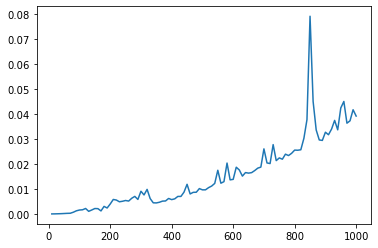

In [9]:
import matplotlib.pyplot as plt

n = 1000
x = [i for i in range(1, n+1) if i%10 == 0]
time = []
for i in x:
    time.append(bench_mark(i))

plt.plot(x, time)

## findMax_2 

다음의 `alist`중 가장 큰 수를 찾는 코드를 작성하고, $T(n)$과 $O(n)$을 구해보세요. 

```
alist = [2, 8, 1, 9, 0, 3, 1, 6]   
```

__Sample run 1:__
```python
findMax_2(alist)
```

__Output:__

```codes
9
```

In [14]:
def findMax_2(alist):
    max_int = alist[0]
    for i in alist:
        if i > max_int:
            max_int = i
    return max_int

In [15]:
# 확인
print(findMax_2([5,2,1,0,9,10,5,4]))
print(findMax_2([0,2,3,4]))
print(findMax_2([2,8,1,9,0,3,1,6]))

10
4
9


답:  
$T(n)=1+n(1+1)= 2n+1$  
$O(n)=n$

##  벤치마크 분석: findMax_2 
 
n값에 따라 난수를 생성하여 alist를 만듭니다.
예를들어 n값이 100이면 크기가 100이며 0부터 100까지의 난수로 구성된 alist를 만듭니다.
벤치마크 분석을 이용하여 `findMax_2()`함수에 n을 인자로 넣어주고 시간을 측정합니다.

In [16]:
from random import randrange
import timeit

def bench_mark2(n):
    alist = [randrange(0,n+1) for _ in range(n)]
    start = timeit.default_timer()
    findMax_2(alist)
    end = timeit.default_timer()
    
    return (end - start)

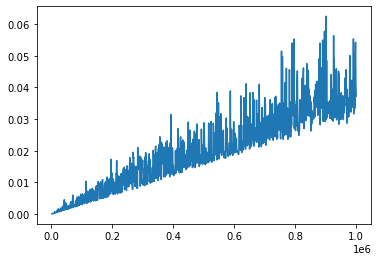

In [18]:
import matplotlib.pyplot as plt

n = 1_000_000
x = [i for i in range(1, n+1) if i%1000 == 0]
time = []
for i in x:
    time.append(bench_mark2(i))

plt.plot(x, time)

# 참고자료
- Problem Solving with Algorithms and Data Structures using Python, [Here](https://runestone.academy/runestone/books/published/pythonds3/Introduction/WhyStudyDataStructuresandAbstractDataTypes.html)
